# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import csv
import sys
from scipy.stats import linregress
from scipy import stats


# Import API key
from api_key_store import weather_api_key

#URL for weather
url  = "http://api.openweathermap.org/data/2.5/weather?q="
apikey = "&APPID="+weather_api_key
units = "&units=imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
sizes = 1500

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=sizes)
lngs = np.random.uniform(low=-180.000, high=180.000, size=sizes)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
responses = []
weatherdatas = []
locdatas = []
clouddatas = []
winddatas = []
legitcit = []
alldata = []
y=1

for x in cities :
    response = requests.get(url + x + apikey + units)
    if response.status_code != 404: 
        responses.append(response)
        legitcit.append(x)
    print(f"City Number = {y}, City = {x}")
    y = y + 1

print("DONE GATHERING")
    
for x in responses :
    data = x.json()
    alldata.append(data)
    weatherdatas.append(data['main'])
    locdatas.append(data['coord'])
    clouddatas.append(data['clouds'])
    winddatas.append(data['wind'])
    


City Number = 1, City = kavieng
City Number = 2, City = monrovia
City Number = 3, City = albany
City Number = 4, City = jamestown
City Number = 5, City = bluff
City Number = 6, City = weston
City Number = 7, City = hilo
City Number = 8, City = mar del plata
City Number = 9, City = ilanskiy
City Number = 10, City = pali
City Number = 11, City = hasaki
City Number = 12, City = cape town
City Number = 13, City = constitucion
City Number = 14, City = alma
City Number = 15, City = hauge
City Number = 16, City = tuatapere
City Number = 17, City = albury
City Number = 18, City = chokurdakh
City Number = 19, City = nemuro
City Number = 20, City = rikitea
City Number = 21, City = arraial do cabo
City Number = 22, City = atuona
City Number = 23, City = marsh harbour
City Number = 24, City = hauterive
City Number = 25, City = taolanaro
City Number = 26, City = busselton
City Number = 27, City = punta arenas
City Number = 28, City = new norfolk
City Number = 29, City = genhe
City Number = 30, City

City Number = 236, City = khorinsk
City Number = 237, City = nome
City Number = 238, City = galgani
City Number = 239, City = ulladulla
City Number = 240, City = waingapu
City Number = 241, City = bilibino
City Number = 242, City = aktash
City Number = 243, City = tiksi
City Number = 244, City = te anau
City Number = 245, City = tsihombe
City Number = 246, City = east london
City Number = 247, City = bandundu
City Number = 248, City = afsin
City Number = 249, City = flinders
City Number = 250, City = tekeli
City Number = 251, City = buraydah
City Number = 252, City = corrente
City Number = 253, City = tazovskiy
City Number = 254, City = saint-prosper
City Number = 255, City = hailar
City Number = 256, City = cleburne
City Number = 257, City = port blair
City Number = 258, City = kutum
City Number = 259, City = broome
City Number = 260, City = serenje
City Number = 261, City = saint-georges
City Number = 262, City = nishihara
City Number = 263, City = khudumelapye
City Number = 264, Cit

City Number = 468, City = shache
City Number = 469, City = hervey bay
City Number = 470, City = bargal
City Number = 471, City = marcona
City Number = 472, City = fandriana
City Number = 473, City = dingle
City Number = 474, City = kaseda
City Number = 475, City = salta
City Number = 476, City = shizunai
City Number = 477, City = batagay
City Number = 478, City = kloulklubed
City Number = 479, City = hays
City Number = 480, City = husavik
City Number = 481, City = goba
City Number = 482, City = vagur
City Number = 483, City = baykit
City Number = 484, City = grand river south east
City Number = 485, City = banjar
City Number = 486, City = puerto escondido
City Number = 487, City = saleaula
City Number = 488, City = clawson
City Number = 489, City = mahanoro
City Number = 490, City = jawhar
City Number = 491, City = sola
City Number = 492, City = shibetsu
City Number = 493, City = kikwit
City Number = 494, City = brownwood
City Number = 495, City = oktyabrskoye
City Number = 496, City =

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
temp = []
pressure = []
humidity = []
temp_min = []
temp_max = []
lat = []
lon = []
clouds = []
wind = []
dfcit = []
y=0
for x in weatherdatas:
    temp.append(weatherdatas[y]['temp'])
    pressure.append(weatherdatas[y]['pressure'])
    humidity.append(weatherdatas[y]['humidity'])
    temp_min.append(weatherdatas[y]['temp_min'])
    temp_max.append(weatherdatas[y]['temp_max'])
    clouds.append(clouddatas[y]['all'])
    lat.append(locdatas[y]['lat'])
    lon.append(locdatas[y]['lon'])
    wind.append(winddatas[y]['speed'])
    y=y+1
    
dfcit = pd.DataFrame(legitcit)
dfcit = dfcit.rename(columns={ 0 : "Cities"})
dfcit["Latitude"] = lat
dfcit["Longitude"] = lon
dfcit["Temperature (F)"] = temp
dfcit["Pressure"] = pressure
dfcit["Humidity (%)"] = humidity
dfcit["Minimum Temperature (F)"] = temp_min
dfcit["Maximum Temperature (F)"] = temp_max
dfcit["Cloud Coverage (%)"] = clouds
dfcit["Wind Speed (mph)"] = wind

dfcit.head()

,Cities,Latitude,Longitude,Temperature (F),Pressure,Humidity (%),Minimum Temperature (F),Maximum Temperature (F),Cloud Coverage (%),Wind Speed (mph)
0,kavieng,-2.57,150.80,82.58,1012.17,70,82.58,82.58,73,5.99
1,monrovia,6.33,-10.80,78.80,1012.00,94,78.80,78.80,75,9.06
2,albany,42.65,-73.75,70.02,1011.00,69,64.99,75.20,75,10.29
3,jamestown,-33.21,138.60,80.01,1021.16,18,80.01,80.01,0,15.46
4,bluff,-23.58,149.07,72.38,1025.34,58,72.38,72.38,18,18.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Temperature (F)')

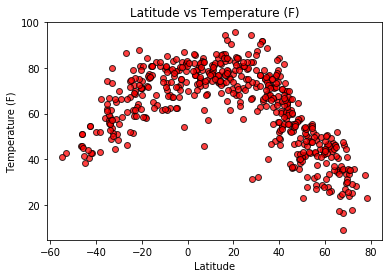

In [6]:
plt.scatter(dfcit['Latitude'], dfcit['Temperature (F)'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

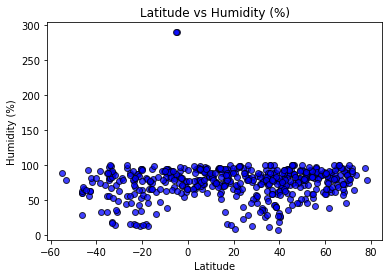

In [7]:
plt.scatter(dfcit['Latitude'], dfcit['Humidity (%)'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloud Coverage (%)')

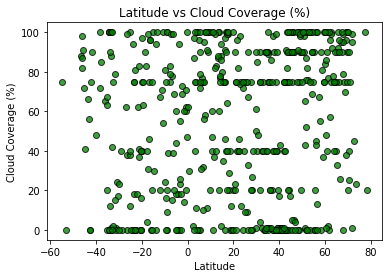

In [8]:
plt.scatter(dfcit['Latitude'], dfcit['Cloud Coverage (%)'], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Cloud Coverage (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

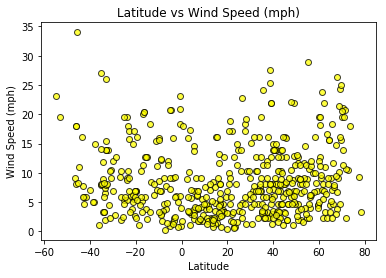

In [9]:
plt.scatter(dfcit['Latitude'], dfcit['Wind Speed (mph)'], marker="o", facecolors="yellow", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

In [11]:
# Create Northern and Southern Hemisphere DataFrames
north = dfcit.loc[dfcit["Latitude"] > 0]
south = dfcit.loc[dfcit["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is -0.8240723898617601


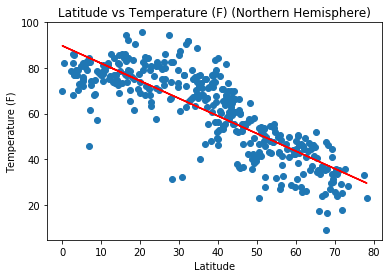

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Latitude'], north['Temperature (F)'])
regress_values = north['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north['Latitude'],north['Temperature (F)'])
plt.plot(north['Latitude'],regress_values,"r-")
plt.title("Latitude vs Temperature (F) (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

print(f"The R Value is {r_value}")
plt.savefig(output_data_file+"/Northern_Lats_vs_Max_Temp.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The R Value is 0.7283235630095475


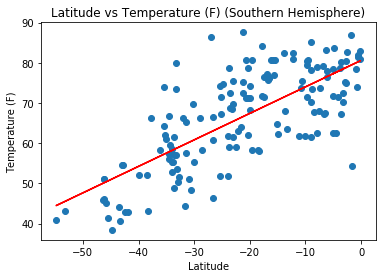

In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Latitude'], south['Temperature (F)'])
regress_values = south['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south['Latitude'],south['Temperature (F)'])
plt.plot(south['Latitude'],regress_values,"r-")
plt.title("Latitude vs Temperature (F) (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

print(f"The R Value is {r_value}")
plt.savefig(output_data_file+"/Southern_Lats_vs_Max_Temp.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.032547647176574254


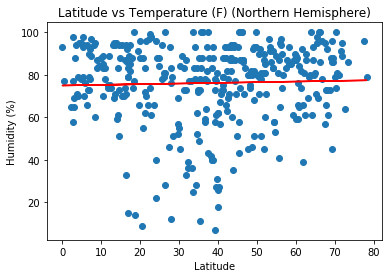

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Latitude'], north['Humidity (%)'])
regress_values = north['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north['Latitude'],north['Humidity (%)'])
plt.plot(north['Latitude'],regress_values,"r-")
plt.title("Latitude vs Temperature (F) (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The R Value is {r_value}") 
plt.savefig(output_data_file+"/Northern_Lats_vs_Humidity.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The R Value is 0.20369749294814157


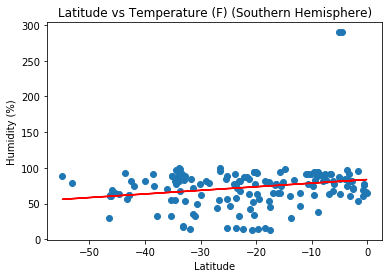

In [16]:
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Latitude'], south['Humidity (%)'])
regress_values = south['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south['Latitude'],south['Humidity (%)'])
plt.plot(south['Latitude'],regress_values,"r-")
plt.title("Latitude vs Temperature (F) (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

print(f"The R Value is {r_value}")
plt.savefig(output_data_file+"/Southern_Lats_vs_Humidity.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is 0.07802543443337796


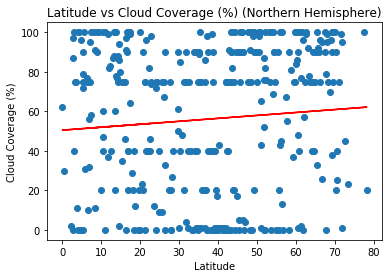

In [17]:
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Latitude'], north['Cloud Coverage (%)'])
regress_values = north['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north['Latitude'],north['Cloud Coverage (%)'])
plt.plot(north['Latitude'],regress_values,"r-")
plt.title("Latitude vs Cloud Coverage (%) (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)")

print(f"The R Value is {r_value}") 
plt.savefig(output_data_file+"/Northern_Lats_vs_Cloudiness.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The R Value is -0.054587661761218174


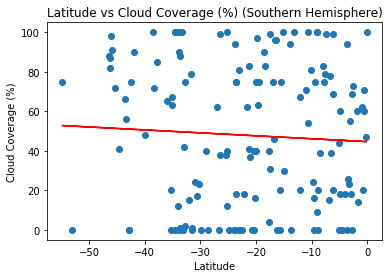

In [18]:
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Latitude'], south['Cloud Coverage (%)'])
regress_values = south['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south['Latitude'],south['Cloud Coverage (%)'])
plt.plot(south['Latitude'],regress_values,"r-")
plt.title("Latitude vs Cloud Coverage (%) (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)")

print(f"The R Value is {r_value}")
plt.savefig(output_data_file+"/Southern_Lats_vs_Cloudiness.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is 0.29543578683957605


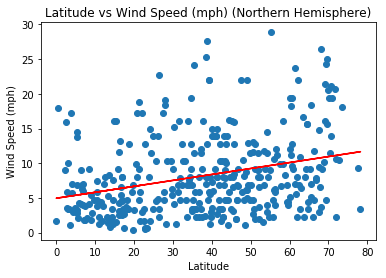

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(north['Latitude'], north['Wind Speed (mph)'])
regress_values = north['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(north['Latitude'],north['Wind Speed (mph)'])
plt.plot(north['Latitude'],regress_values,"r-")
plt.title("Latitude vs Wind Speed (mph) (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


print(f"The R Value is {r_value}") 
plt.savefig(output_data_file+"/Northern_Lats_vs_Wind_Speed.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The R Value is -0.18972846913490793


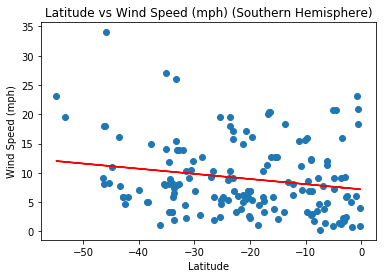

In [20]:
slope, intercept, r_value, p_value, std_err = stats.linregress(south['Latitude'], south['Wind Speed (mph)'])
regress_values = south['Latitude'] * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south['Latitude'],south['Wind Speed (mph)'])
plt.plot(south['Latitude'],regress_values,"r-")
plt.title("Latitude vs Wind Speed (mph) (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

print(f"The R Value is {r_value}") 
plt.savefig(output_data_file+"/Southern_Lats_vs_Wind_Speed.png")


In [21]:
dfcit.to_csv (output_data_file+"/cities.csv", index = None, header=True)